In [106]:
import tensorflow.compat.v1 as tf # 1.xxversion을 사용
tf.disable_v2_behavior() #2.xx version 기능 사용불가
#tf 1.xx version -> 2.xx version
import random
# from tensorflow.examples.tutorials.mnist import input_data
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
#tf 1.xx version -> 2.xx version
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [107]:
df=pd.read_csv("iris.csv",names=['sepal_length','sepal_width','petal_length','petal_width','species'])

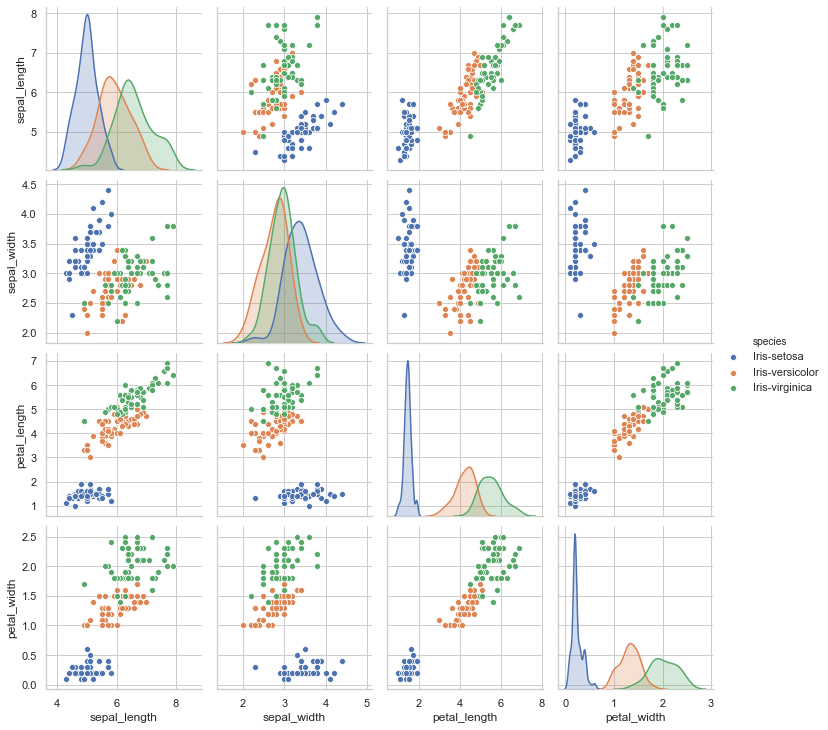

In [108]:
sns.pairplot(df, hue='species')

In [109]:
data = df.values #dataframe->array
x =data[:,0:4].astype(float)

In [110]:
ydata=data[:,4]
le =LabelEncoder()
le.fit(ydata)
y=le.transform(ydata)
y= np_utils.to_categorical(y)

In [111]:
print(x.shape)
print(y.shape)

(150, 4)
(150, 3)


In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=321)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [113]:
model=Sequential()
model.add(Dense(units=2, input_dim=4, activation='relu')) #레이어 설계
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))


In [114]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [115]:
hist= model.fit(xtrain, ytrain, batch_size=3, epochs=30)

Train on 120 samples
Epoch 1/30
120/120 [==============================] - 0s 308us/sample - loss: 1.0518 - acc: 0.5500
Epoch 2/30
120/120 [==============================] - 0s 274us/sample - loss: 0.9150 - acc: 0.6917
Epoch 3/30
120/120 [==============================] - 0s 266us/sample - loss: 0.8204 - acc: 0.6917
Epoch 4/30
120/120 [==============================] - 0s 249us/sample - loss: 0.7332 - acc: 0.6917
Epoch 5/30
120/120 [==============================] - 0s 266us/sample - loss: 0.6611 - acc: 0.6917
Epoch 6/30
120/120 [==============================] - 0s 283us/sample - loss: 0.5958 - acc: 0.6917
Epoch 7/30
120/120 [==============================] - 0s 266us/sample - loss: 0.5537 - acc: 0.6917
Epoch 8/30
  3/120 [..............................] - ETA: 0s - loss: 0.4026 - acc: 0.666120/120 [==============================] - 0s 258us/sample - loss: 0.5235 - acc: 0.7083
Epoch 9/30
120/120 [==============================] - 0s 457us/sample - loss: 0.5115 - acc: 0.6583
Epoch 10/3

In [116]:
model.evaluate(xtest,ytest, batch_size=3)

[0.2576610442949459, 0.8666667]

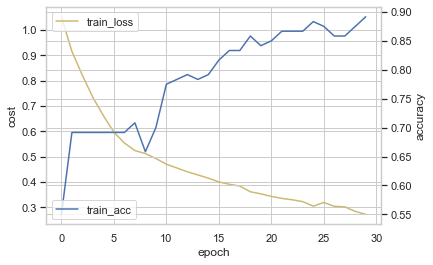

In [117]:
fig, axes=plt.subplots()
accax=axes.twinx()
axes.plot(hist.history['loss'], 'y', label="train_loss")
accax.plot(hist.history['acc'], 'b', label="train_acc")
axes.set_xlabel('epoch')
axes.set_ylabel('cost')
accax.set_ylabel('accuracy')
axes.legend(loc="upper left")
accax.legend(loc="lower left")
plt.show()


In [118]:
yhat=model.predict(x)
count = 0
for i in range(len(yhat)):
    print(np.argmax(yhat[i]),np.argmax(y[i]))
    if(np.argmax(yhat[i])==np.argmax(y[i])):
        count += 1
acc = count/len(yhat)
print("정확도:%f"%acc)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
2 1
1 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
2 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
2 1
2 1
1 1
1 1
2 1
2 1
1 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
2 1
1 1
1 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
1 2
2 2
2 2
2 2
2 2
1 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
1 2
2 2
2 2
1 2
2 2
2 2
2 2
2 2
2 2
2 2
1 2
2 2
정확도:0.886667
